# Task 2

Perform data cleaning and exploratory data analysis (EDA) on a dataset of your choice, such as the Titanic dataset. Explore the relationships between variables and identify patterns and trends in the data.

In [125]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns 

Loading the dataset

In [126]:
titanic=pd.read_csv('titanic.csv')

In [127]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   pclass     1309 non-null   int64  
 1   survived   1309 non-null   int64  
 2   name       1309 non-null   object 
 3   sex        1309 non-null   object 
 4   age        1046 non-null   float64
 5   sibsp      1309 non-null   int64  
 6   parch      1309 non-null   int64  
 7   ticket     1309 non-null   object 
 8   fare       1308 non-null   float64
 9   cabin      295 non-null    object 
 10  embarked   1307 non-null   object 
 11  boat       486 non-null    object 
 12  body       121 non-null    float64
 13  home.dest  745 non-null    object 
dtypes: float64(3), int64(4), object(7)
memory usage: 143.3+ KB


In [128]:
titanic.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


Let's catergorise the columns into types

Numerical Data : Age, Fare

Categorical Data : Pclass, Survived, Sex, Embarked, Sibsp, Parch

Identifiers and Mixed Data: Name, Ticket, Boat, Body, home.dest

# Univariate Analysis

## Numeric Data:


### Age

In [129]:
titanic['age'].describe()

count    1046.000000
mean       29.881135
std        14.413500
min         0.166700
25%        21.000000
50%        28.000000
75%        39.000000
max        80.000000
Name: age, dtype: float64

<Axes: ylabel='Frequency'>

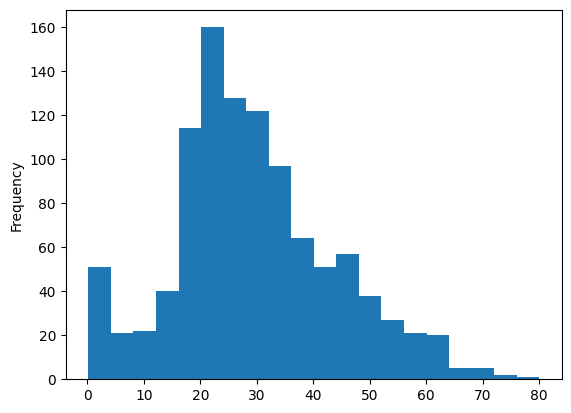

In [130]:
titanic['age'].plot(kind='hist',bins=20)

<Axes: ylabel='Density'>

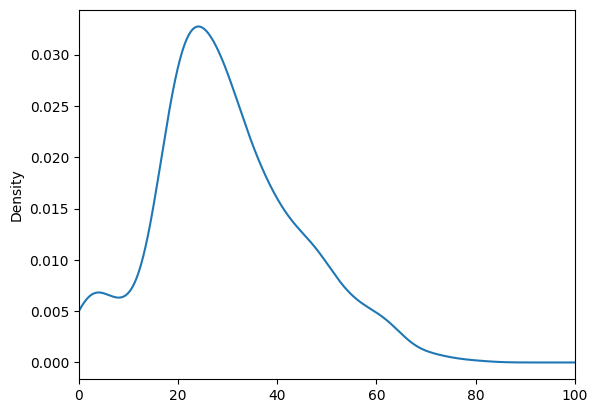

In [131]:
titanic['age'].plot(kind='kde',xlim=(0,100))

In [132]:
titanic['age'].skew()

np.float64(0.4076718864978293)

<Axes: >

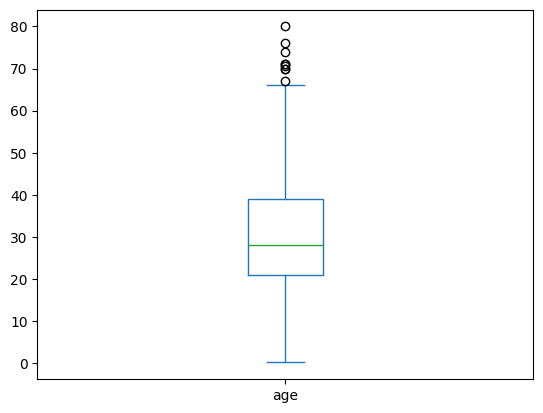

In [133]:
titanic['age'].plot(kind='box')

In [134]:
titanic[titanic['age']>65]

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
9,1,0,"Artagaveytia, Mr. Ramon",male,71.0,0,0,PC 17609,49.5042,NaN,C,NaN,22.0,"Montevideo, Uruguay"
14,1,1,"Barkworth, Mr. Algernon Henry Wilson",male,80.0,0,0,27042,30.0000,A23,S,B,NaN,"Hessle, Yorks"
61,1,1,"Cavendish, Mrs. Tyrell William (Julia Florence...",female,76.0,1,0,19877,78.8500,C46,S,6,NaN,"Little Onn Hall, Staffs"
81,1,0,"Crosby, Capt. Edward Gifford",male,70.0,1,1,WE/P 5735,71.0000,B22,S,NaN,269.0,"Milwaukee, WI"
135,1,0,"Goldschmidt, Mr. George B",male,71.0,0,0,PC 17754,34.6542,A5,C,NaN,NaN,"New York, NY"
285,1,0,"Straus, Mr. Isidor",male,67.0,1,0,PC 17483,221.7792,C55 C57,S,NaN,96.0,"New York, NY"
506,2,0,"Mitchell, Mr. Henry Michael",male,70.0,0,0,C.A. 24580,10.5000,NaN,S,NaN,NaN,"Guernsey / Montclair, NJ and/or Toledo, Ohio"
594,2,0,"Wheadon, Mr. Edward H",male,66.0,0,0,C.A. 24579,10.5000,NaN,S,NaN,NaN,"Guernsey, England / Edgewood, RI"
727,3,0,"Connors, Mr. Patrick",male,70.5,0,0,370369,7.7500,NaN,Q,NaN,171.0,NaN
1235,3,0,"Svensson, Mr. Johan",male,74.0,0,0,347060,7.7750,NaN,S,NaN,NaN,NaN


In [135]:
print("No of missing data in age is",titanic['age'].isnull().sum())
print("Ratio of missing to the original data as a whole is",round(titanic['age'].isnull().sum()/titanic['age'].count(),4))

No of missing data in age is 263
Ratio of missing to the original data as a whole is 0.2514


#### Observations :

Average age is 29.88.

Highest age is 80.

Highest frequency of age is in between 20 to 30.

The given data is moderately positively skewed (0.407).

There are outliers according to the boxplot plot but the maximum age is 80 and we did check that there wer no anomalies in the data so we are not gonna remove any rows as outliers.

About quarter of the age column's data is missing.

We shall fill that considering how it co-relates with other columns rather than just filling it in with mean or median which might hugely change the data as much of it is missing.
    


### Fare 

In [136]:
titanic['fare'].describe()

count    1308.000000
mean       33.295479
std        51.758668
min         0.000000
25%         7.895800
50%        14.454200
75%        31.275000
max       512.329200
Name: fare, dtype: float64

<Axes: ylabel='Frequency'>

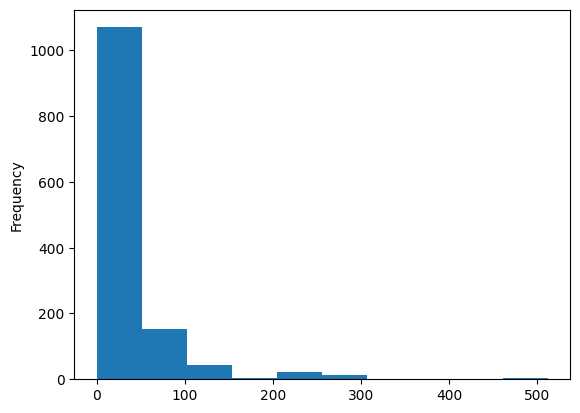

In [137]:
titanic['fare'].plot(kind='hist')

In [138]:
titanic['fare'].skew()

np.float64(4.367709134122922)

<Axes: >

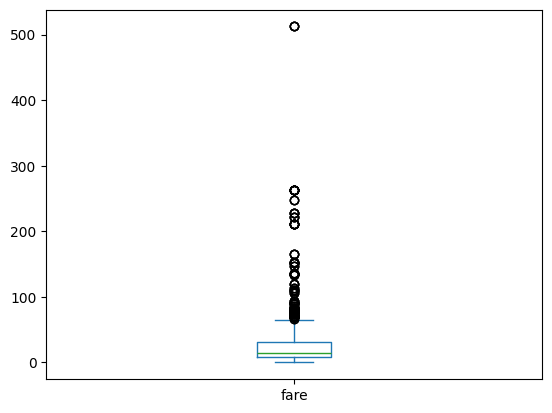

In [139]:
titanic['fare'].plot(kind='box')

In [140]:
titanic[titanic['fare']>300]

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
49,1,1,"Cardeza, Mr. Thomas Drake Martinez",male,36.0,0,1,PC 17755,512.3292,B51 B53 B55,C,3,NaN,"Austria-Hungary / Germantown, Philadelphia, PA"
50,1,1,"Cardeza, Mrs. James Warburton Martinez (Charlo...",female,58.0,0,1,PC 17755,512.3292,B51 B53 B55,C,3,NaN,"Germantown, Philadelphia, PA"
183,1,1,"Lesurer, Mr. Gustave J",male,35.0,0,0,PC 17755,512.3292,B101,C,3,NaN,NaN
302,1,1,"Ward, Miss. Anna",female,35.0,0,0,PC 17755,512.3292,NaN,C,3,NaN,NaN


In [141]:
titanic[titanic['fare']>250].sort_values(by='fare',ascending=False)

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
49,1,1,"Cardeza, Mr. Thomas Drake Martinez",male,36.0,0,1,PC 17755,512.3292,B51 B53 B55,C,3,NaN,"Austria-Hungary / Germantown, Philadelphia, PA"
302,1,1,"Ward, Miss. Anna",female,35.0,0,0,PC 17755,512.3292,NaN,C,3,NaN,NaN
50,1,1,"Cardeza, Mrs. James Warburton Martinez (Charlo...",female,58.0,0,1,PC 17755,512.3292,B51 B53 B55,C,3,NaN,"Germantown, Philadelphia, PA"
183,1,1,"Lesurer, Mr. Gustave J",male,35.0,0,0,PC 17755,512.3292,B101,C,3,NaN,NaN
116,1,1,"Fortune, Mrs. Mark (Mary McDougald)",female,60.0,1,4,19950,263.0000,C23 C25 C27,S,10,NaN,"Winnipeg, MB"
114,1,0,"Fortune, Mr. Charles Alexander",male,19.0,3,2,19950,263.0000,C23 C25 C27,S,NaN,NaN,"Winnipeg, MB"
113,1,1,"Fortune, Miss. Mabel Helen",female,23.0,3,2,19950,263.0000,C23 C25 C27,S,10,NaN,"Winnipeg, MB"
111,1,1,"Fortune, Miss. Alice Elizabeth",female,24.0,3,2,19950,263.0000,C23 C25 C27,S,10,NaN,"Winnipeg, MB"
112,1,1,"Fortune, Miss. Ethel Flora",female,28.0,3,2,19950,263.0000,C23 C25 C27,S,10,NaN,"Winnipeg, MB"
115,1,0,"Fortune, Mr. Mark",male,64.0,1,4,19950,263.0000,C23 C25 C27,S,NaN,NaN,"Winnipeg, MB"


In [142]:
titanic[titanic['ticket']=='PC 17755']

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
49,1,1,"Cardeza, Mr. Thomas Drake Martinez",male,36.0,0,1,PC 17755,512.3292,B51 B53 B55,C,3,NaN,"Austria-Hungary / Germantown, Philadelphia, PA"
50,1,1,"Cardeza, Mrs. James Warburton Martinez (Charlo...",female,58.0,0,1,PC 17755,512.3292,B51 B53 B55,C,3,NaN,"Germantown, Philadelphia, PA"
183,1,1,"Lesurer, Mr. Gustave J",male,35.0,0,0,PC 17755,512.3292,B101,C,3,NaN,NaN
302,1,1,"Ward, Miss. Anna",female,35.0,0,0,PC 17755,512.3292,NaN,C,3,NaN,NaN


In [143]:
titanic[titanic['ticket']=='PC 17608']

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
35,1,1,"Bowen, Miss. Grace Scott",female,45.0,0,0,PC 17608,262.375,NaN,C,4,NaN,"Cooperstown, NY"
66,1,1,"Chaudanson, Miss. Victorine",female,36.0,0,0,PC 17608,262.375,B61,C,4,NaN,NaN
249,1,1,"Ryerson, Master. John Borie",male,13.0,2,2,PC 17608,262.375,B57 B59 B63 B66,C,4,NaN,"Haverford, PA / Cooperstown, NY"
250,1,1,"Ryerson, Miss. Emily Borie",female,18.0,2,2,PC 17608,262.375,B57 B59 B63 B66,C,4,NaN,"Haverford, PA / Cooperstown, NY"
251,1,1,"Ryerson, Miss. Susan Parker 'Suzette'",female,21.0,2,2,PC 17608,262.375,B57 B59 B63 B66,C,4,NaN,"Haverford, PA / Cooperstown, NY"
252,1,0,"Ryerson, Mr. Arthur Larned",male,61.0,1,3,PC 17608,262.375,B57 B59 B63 B66,C,NaN,NaN,"Haverford, PA / Cooperstown, NY"
253,1,1,"Ryerson, Mrs. Arthur Larned (Emily Maria Borie)",female,48.0,1,3,PC 17608,262.375,B57 B59 B63 B66,C,4,NaN,"Haverford, PA / Cooperstown, NY"


In [144]:
titanic['fare'].isnull().sum()

np.int64(1)

In [145]:
titanic[titanic['fare'].isnull()]

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
1225,3,0,"Storey, Mr. Thomas",male,60.5,0,0,3701,NaN,NaN,S,NaN,261.0,NaN


In [146]:
titanic[titanic['ticket']=='3701']

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
1225,3,0,"Storey, Mr. Thomas",male,60.5,0,0,3701,NaN,NaN,S,NaN,261.0,NaN


#### Observations :

Mean is 33.
    
Highest is 512.33

Most of the passangers' fare is below 100.

The fare column is highly positively skewed.

This column has many outliers.

While checking the outliers to determine if they were actually outliers or not. It is found that the some of the outliers whose ticket fare were same had :

1)The same ticket code

2)They all had the same surname. 

3)The number of companions they were travelling with matched up.

This followed suit for the most of the column and suggesting that the fare was not for the individual rather it was the ticket fare. 

Therefore we have to create a new feature column to indicate the individual person's fare.

## Categorical data:

### Survived 

In [147]:
Survivability=titanic['survived'].value_counts()
Survivability

survived
0    809
1    500
Name: count, dtype: int64

(array([0, 1]), [Text(0, 0, '0'), Text(1, 0, '1')])

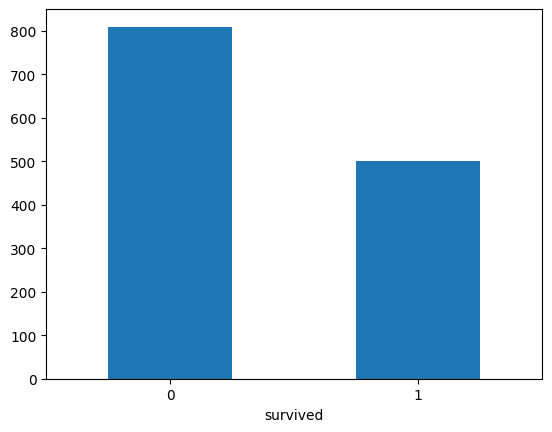

In [148]:
Survivability.plot(kind='bar')
plt.xticks(rotation=0)

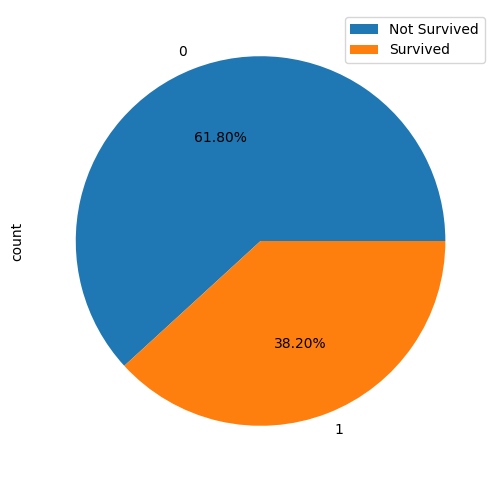

In [149]:
Survivability.plot(kind='pie',autopct='%.2f%%',figsize=(8,6))
plt.legend(['Not Survived','Survived'],loc='upper right')

In [150]:
titanic['survived'].isnull().sum()

np.int64(0)

#### Observations:
    No missing values 
    More than half of the population did not survive the crash


### Passanger class

In [151]:
Passangers_per_class=titanic['pclass'].value_counts()
Passangers_per_class=Passangers_per_class.sort_index()
Passangers_per_class

pclass
1    323
2    277
3    709
Name: count, dtype: int64

(array([0, 1, 2]), [Text(0, 0, '1'), Text(1, 0, '2'), Text(2, 0, '3')])

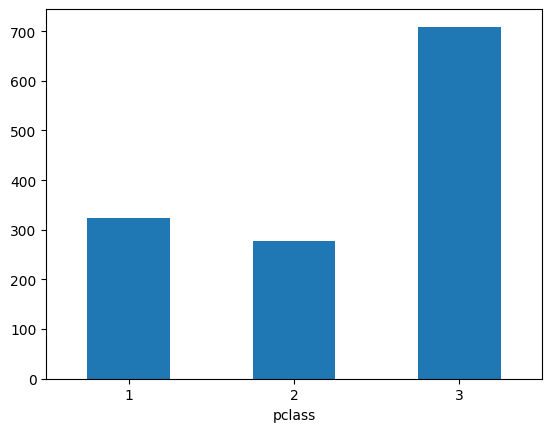

In [152]:
Passangers_per_class.plot(kind='bar')
plt.xticks(rotation=0)

Text(0, 0.5, '')

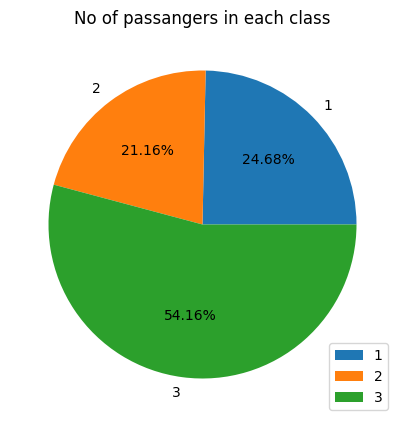

In [153]:
Passangers_per_class.plot(x=Passangers_per_class.index,
                          y=Passangers_per_class,
                          kind='pie',
                          autopct='%.2f%%',
                          figsize=(8,5))   
plt.legend(loc='lower right') 
plt.title('No of passangers in each class')
plt.ylabel('')

In [154]:
titanic['pclass'].isnull().sum()

np.int64(0)

#### Observations:

Most of the population was in Passanger class 3( about 54% )

Then a quarter of them were in Passanger class 1( about 25% ).

There are no missing values.

### Sex

In [155]:
Population_by_Sex=titanic['sex'].value_counts()
Population_by_Sex

sex
male      843
female    466
Name: count, dtype: int64

(array([0, 1]), [Text(0, 0, 'male'), Text(1, 0, 'female')])

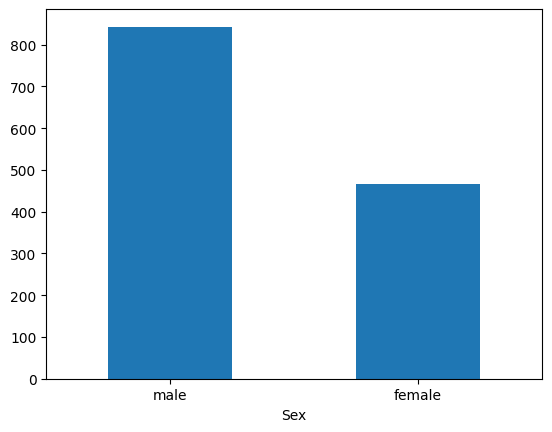

In [156]:
Population_by_Sex.plot(kind='bar')
plt.xlabel('Sex')
plt.xticks(rotation=0)

Text(0.5, 1.0, 'Population by Sex')

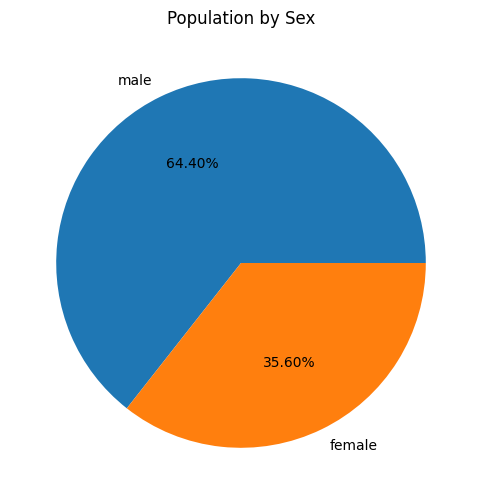

In [157]:
Population_by_Sex.plot(kind='pie',autopct='%.2f%%',figsize=(8,6))
plt.ylabel('')
plt.title("Population by Sex")

In [158]:
titanic['sex'].isnull().sum()

np.int64(0)

#### Observations:

No missing data

There were more men than women sailing on the ship.

### Embarked

In [159]:
Population_by_boarding_point=titanic['embarked'].value_counts()
Population_by_boarding_point

embarked
S    914
C    270
Q    123
Name: count, dtype: int64

[Text(0, 0, 'Southhampton'), Text(1, 0, 'Cherbourg'), Text(2, 0, 'QueensTown')]

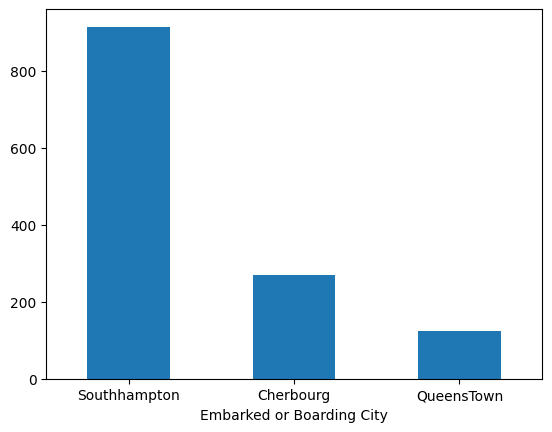

In [160]:
plot_A = Population_by_boarding_point.plot(kind='bar')
plt.xlabel('Embarked or Boarding City')
plot_A.set_xticklabels(['Southhampton','Cherbourg','QueensTown'],rotation=0)

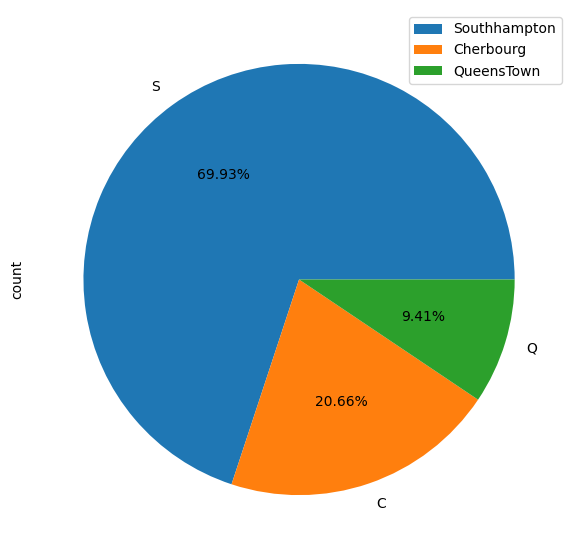

In [161]:
plot_B = Population_by_boarding_point.plot(kind='pie',autopct='%.2f%%',figsize=(8,7))
plt.legend(['Southhampton','Cherbourg','QueensTown'])

In [162]:
titanic['embarked'].isnull().sum()

np.int64(2)

In [163]:
titanic[titanic['embarked'].isnull()]

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
168,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN,6,NaN,NaN
284,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN,6,NaN,"Cincinatti, OH"


In [164]:
titanic[titanic['ticket']=='113572']

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
168,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN,6,NaN,NaN
284,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN,6,NaN,"Cincinatti, OH"


In [165]:
titanic['embarked']=titanic['embarked'].fillna('S')

#### Observations:

Most of the passangers embarked on this sail from the starting point Southhampton.

There are only two missing values in the column and they both are with the same ticket but htey are neither siblings nor parent/child of one another.

Since only these are the missing values let's fill them with the mode of the column (i.e. Southhampton)

###  Sibings or Spouse and  Parent or Child 

In [166]:
titanic['sibsp'].value_counts()

sibsp
0    891
1    319
2     42
4     22
3     20
8      9
5      6
Name: count, dtype: int64

In [167]:
titanic['parch'].value_counts()

parch
0    1002
1     170
2     113
3       8
4       6
5       6
6       2
9       2
Name: count, dtype: int64

#### Observations: 

These columns don't have much to explain by themselves but we shall feature 2 new columns namely No_of_companions by adding them up and isalone to determine how being alone affects other columns.

# Bivariate Analysis

### Survived vs Sex

In [168]:
Survival_count_by_sex=titanic[titanic['survived']==1].groupby('sex')['survived'].size()
Survival_count_by_sex

sex
female    339
male      161
Name: survived, dtype: int64

In [169]:
Not_survived_count_by_sex=titanic[titanic['survived']==0].groupby('sex')['survived'].size()
Not_survived_count_by_sex

sex
female    127
male      682
Name: survived, dtype: int64

In [170]:
print("Ratio of man survived to total ",round(Survival_count_by_sex['male']/Population_by_Sex['male'],4))
print("Ratio of woman survived to total ",round(Survival_count_by_sex['female']/Population_by_Sex['female'],4))

Ratio of man survived to total  0.191
Ratio of woman survived to total  0.7275


In [171]:
grouped_data = titanic.groupby(['sex', 'survived']).size().unstack()
grouped_data

survived,0,1
sex,,
female,127,339
male,682,161


In [172]:
grouped_data = grouped_data[[1,0]]

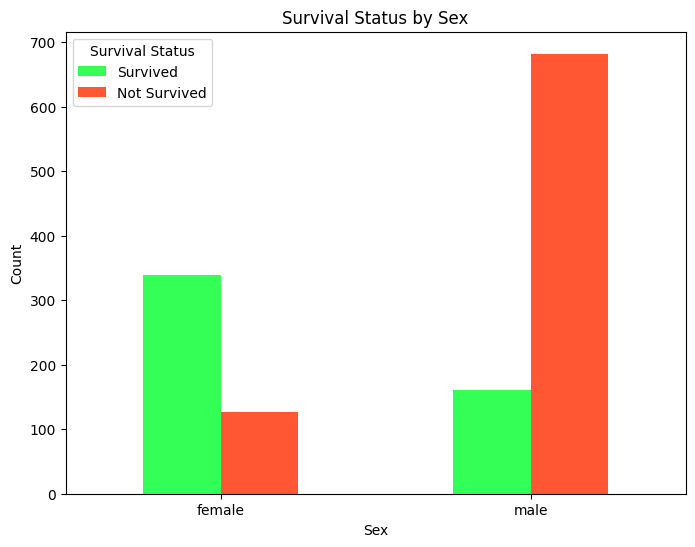

In [173]:
grouped_data.plot(kind='bar', stacked=False, figsize=(8, 6), color=['#33FF57','#FF5733'])

plt.title('Survival Status by Sex')
plt.ylabel('Count')
plt.xlabel('Sex')
plt.xticks(rotation=0)
plt.legend(['Survived', 'Not Survived'], title='Survival Status')
plt.show()

#### Observations:

The survival rate of men (0.191) is way lesser than that of women (0.7275).

This shows that women were prioritised at that situation.

### Survived vs pclass

In [174]:
Survived_per_pclass = titanic.groupby(['pclass', 'survived']).size().unstack()
Survived_per_pclass = Survived_per_pclass[[1,0]]
Survived_per_pclass

survived,1,0
pclass,,
1,200,123
2,119,158
3,181,528


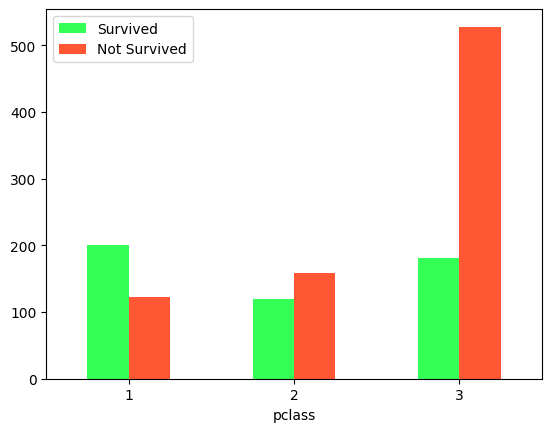

In [175]:
Survived_per_pclass.plot(kind='bar',color=['#33FF57','#FF5733'])
plt.xticks(rotation=0)
plt.legend(['Survived','Not Survived'])

#### Observations:

Survival rate of Pclass 1 is highest, then followed by Pclass 2 and finally Pclass 3.

This might be due to do the arrangement of the people on the ship where the Pclass 1 might have been closer to the deck.

### Survived vs Embarked

In [176]:
Survived_embarked = titanic.groupby(['embarked', 'survived']).size().unstack()
Survived_embarked = Survived_embarked[[1,0]]

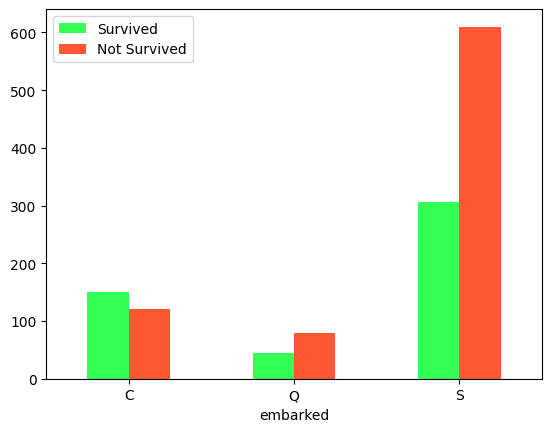

In [177]:
Survived_embarked.plot(kind='bar',color=['#33FF57','#FF5733'])
plt.xticks(rotation=0)
plt.legend(['Survived','Not Survived'])

#### Observations:
Survivability rate is high for people who have embarked from Chebourg might be becasue most of them are from Pclass 1 
    
Although surviabilithy rate is high in people who have embarked frm Chebourg, the hihgest number of surviours are from Southhampton might also be because there were in Pclass 1 or might also just be the population of Southhampton.

### Age vs Plcass

<Axes: xlabel='pclass', ylabel='age'>

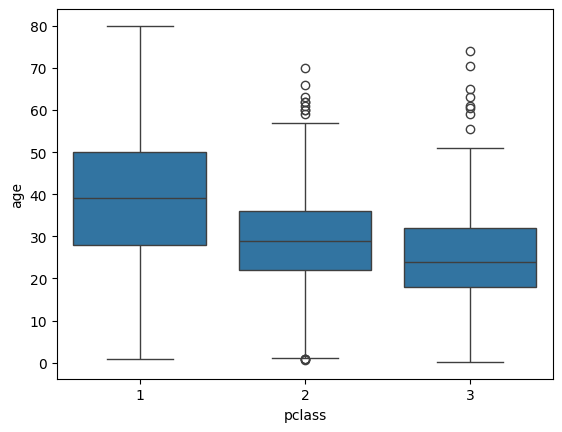

In [178]:
sns.boxplot(data=titanic,x='pclass',y='age')

#### Observations:

The medain age of people in Pclass 1 is approximately 40 which is the highest suggestig that older people chose Pclass 1.

Median age of Pclass 2 is higher than Pclass 3 but lesser than Pclass 1.

Median age of Pclass 3 is the lowest among them inidcating that youngsters chose to travel in pclass 1.

### Age vs Survival

<Axes: ylabel='Density'>

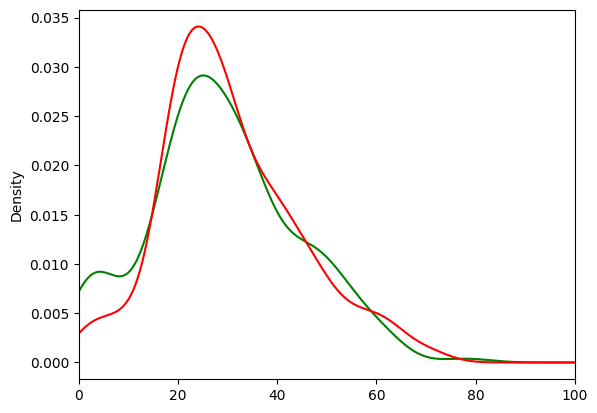

In [179]:
titanic[titanic['survived']==1]['age'].plot(kind='kde',color='green',xlim=(0,100))
titanic[titanic['survived']==0]['age'].plot(kind='kde',color='red',xlim=(0,100))


#### Observations:

The survival rate of children from the age of 0 to 15 is higher maybe due to the priority given to them along with the women 

The survival rate drops from the age 20-30 maybe there were more men in that specific age range 

The survival rate of the people from age 30 to 40 is quite more than ohter age group might be because most of them were in pclass 1 same goes for age 45 to 60 .

<Axes: xlabel='pclass', ylabel='age'>

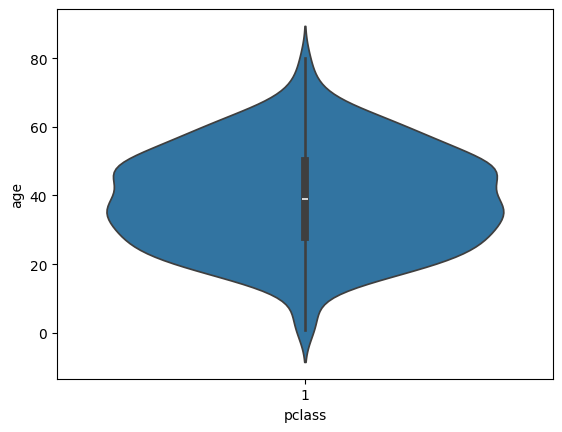

In [180]:
sns.violinplot(data=titanic[titanic['pclass']==1],x='pclass',y='age')

This graph proves the last hypothesis we had

# Feature Engineering

## Fare: 
Creating a new column individual_fare to get the fare of a individual rather than a group

In [181]:
titanic['companions_including_self']=titanic.groupby('ticket')['ticket'].transform('count')

In [182]:
titanic['individual_fare']=titanic['fare']/titanic['companions_including_self']

In [183]:
titanic.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,companions_including_self,individual_fare
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO",4,52.834375
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON",6,25.258333
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",6,25.258333
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON",6,25.258333
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",6,25.258333


## IsAlone:
Creating a new column to see how being alone affects survival rate 

In [184]:
titanic['isalone']=titanic['companions_including_self'].apply(lambda x:1 if x==1 else 0)

In [185]:
titanic.head()


,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,companions_including_self,individual_fare,isalone
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO",4,52.834375,0
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON",6,25.258333,0
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",6,25.258333,0
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON",6,25.258333,0
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",6,25.258333,0


## Age

Imputing missing data based on the other data we have without changing the data hugely by using k nearset neighbours.

In [186]:
numeric_titanic=titanic.select_dtypes(include=[np.number])

correlation_matrix=numeric_titanic.corr()
correlation_matrix

,pclass,survived,age,sibsp,parch,fare,body,companions_including_self,individual_fare,isalone
pclass,1.000000,-0.312469,-0.408106,0.060832,0.018322,-0.558629,-0.034642,-0.078554,-0.770976,0.283445
survived,-0.312469,1.000000,-0.055513,-0.027825,0.082660,0.244265,NaN,0.075293,0.265662,-0.247358
age,-0.408106,-0.055513,1.000000,-0.243699,-0.150917,0.178739,0.058809,-0.185285,0.361767,0.088521
sibsp,0.060832,-0.027825,-0.243699,1.000000,0.373587,0.160238,-0.099961,0.679444,-0.050984,-0.442977
parch,0.018322,0.082660,-0.150917,0.373587,1.000000,0.221539,0.051099,0.647029,-0.030577,-0.445944
fare,-0.558629,0.244265,0.178739,0.160238,0.221539,1.000000,-0.043110,0.478940,0.819868,-0.452650
body,-0.034642,NaN,0.058809,-0.099961,0.051099,-0.043110,1.000000,-0.042707,0.014098,0.030228
companions_including_self,-0.078554,0.075293,-0.185285,0.679444,0.647029,0.478940,-0.042707,1.000000,0.094068,-0.677227
individual_fare,-0.770976,0.265662,0.361767,-0.050984,-0.030577,0.819868,0.014098,0.094068,1.000000,-0.233047
isalone,0.283445,-0.247358,0.088521,-0.442977,-0.445944,-0.452650,0.030228,-0.677227,-0.233047,1.000000


<Axes: >

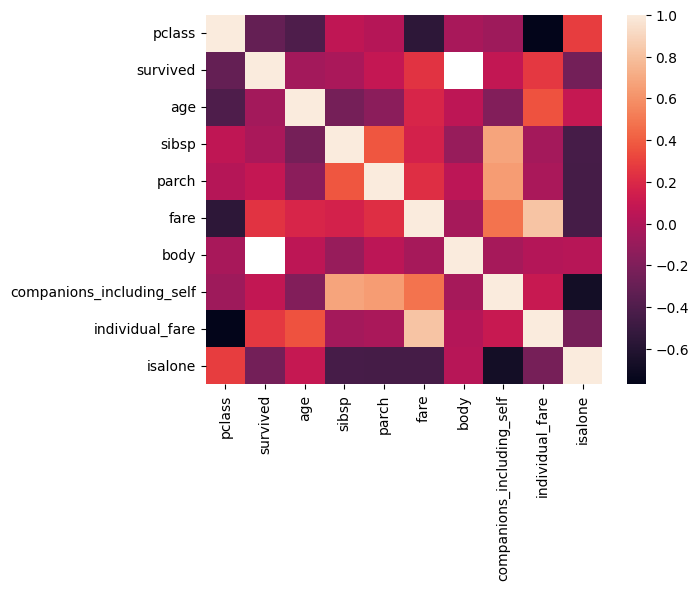

In [187]:
sns.heatmap(correlation_matrix)

<Axes: ylabel='Density'>

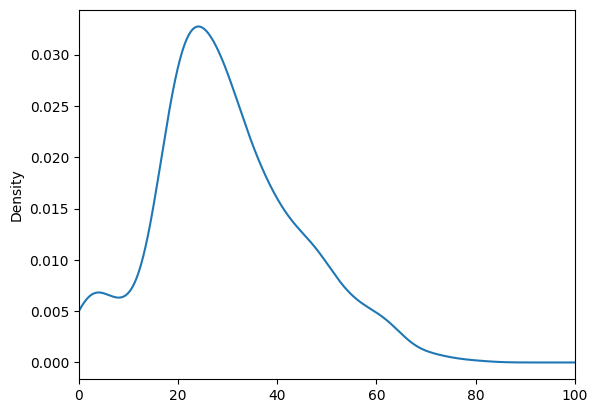

In [188]:
titanic['age'].plot(kind='kde',xlim=(0,100))

In [189]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

In [190]:
imputer=IterativeImputer()
features=['age','pclass','sibsp','parch','individual_fare','isalone']
titanic['age']=imputer.fit_transform(titanic[features])

<Axes: ylabel='Density'>

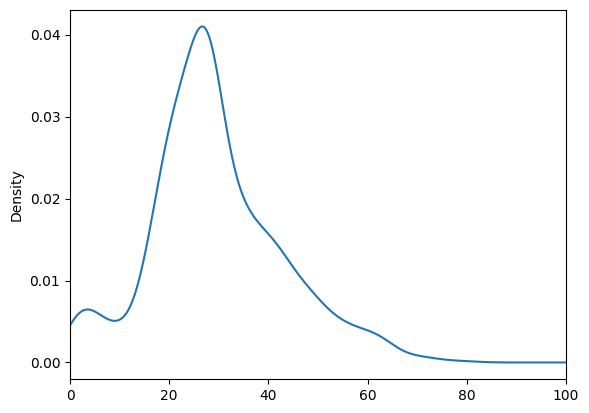

In [191]:
titanic['age'].plot(kind='kde',xlim=(0,100))

In [192]:
titanic['age'].isnull().sum()

np.int64(0)

# Univariate Analysis on the new individual fare and age columns 

## Inidividual fare

In [193]:
titanic['individual_fare'].describe()

count    1308.000000
mean       14.757627
std        13.555638
min         0.000000
25%         7.550000
50%         8.050000
75%        15.008325
max       128.082300
Name: individual_fare, dtype: float64

<Axes: ylabel='Density'>

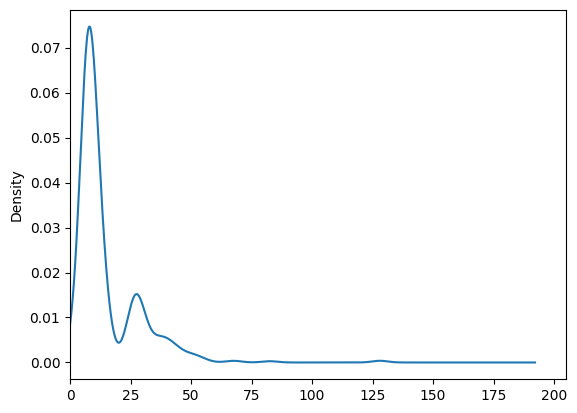

In [194]:
titanic['individual_fare'].plot(kind='kde',xlim=(0,None))

In [195]:
titanic['individual_fare'].skew()

np.float64(3.0433524078854366)

### Observations:
Average fare is 14.57

Median fare is 8.05

Highest fare is 128

Fare is highly skewed as expected because most of the population is from Pclass 3.

## Age

In [196]:
titanic['age'].describe()

count    1309.000000
mean       29.413627
std        13.321390
min         0.166700
25%        21.306352
50%        27.539854
75%        36.000000
max        80.000000
Name: age, dtype: float64

<Axes: ylabel='Frequency'>

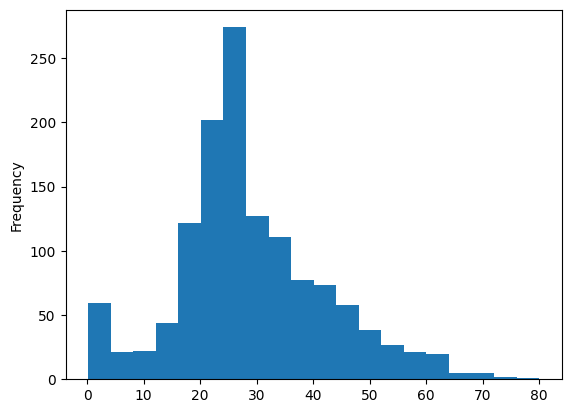

In [197]:
titanic['age'].plot(kind='hist',bins=20)

<Axes: ylabel='Density'>

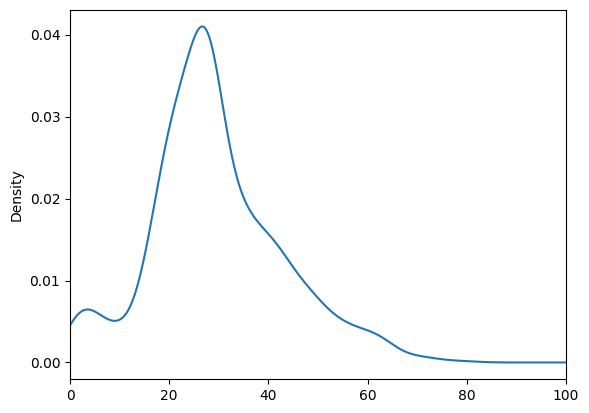

In [198]:
titanic['age'].plot(kind='kde',xlim=(0,100))

In [199]:
titanic['age'].skew()

np.float64(0.47216852467998244)

# Bivariate analysis

## Survival vs isalone

In [200]:
Survived_isalone=titanic.groupby(['isalone','survived']).size().unstack()
Survived_isalone=Survived_isalone[[1,0]]
Survived_isalone

survived,1,0
isalone,,
0,306,290
1,194,519


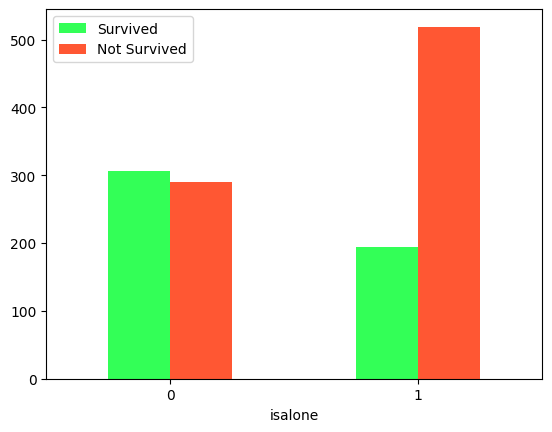

In [201]:
Survived_isalone.plot(kind='bar',color=['#33FF57','#FF5733'])
plt.xticks(rotation=0)
plt.legend(["Survived","Not Survived"])

### Observations:
  If the passanger is alone there had a lesser chance of survival than being with a companion 

In [202]:
Survived_no_of_companions=titanic.groupby(['companions_including_self','survived']).size().unstack()
Survived_no_of_companions=Survived_no_of_companions[[1,0]]
Survived_no_of_companions

survived,1,0
companions_including_self,,
1,194.0,519.0
2,134.0,130.0
3,92.0,55.0
4,45.0,19.0
5,13.0,22.0
6,7.0,17.0
7,9.0,26.0
8,6.0,10.0
11,NaN,11.0


(array([0, 1, 2, 3, 4, 5, 6, 7, 8]),
 [Text(0, 0, '1'),
  Text(1, 0, '2'),
  Text(2, 0, '3'),
  Text(3, 0, '4'),
  Text(4, 0, '5'),
  Text(5, 0, '6'),
  Text(6, 0, '7'),
  Text(7, 0, '8'),
  Text(8, 0, '11')])

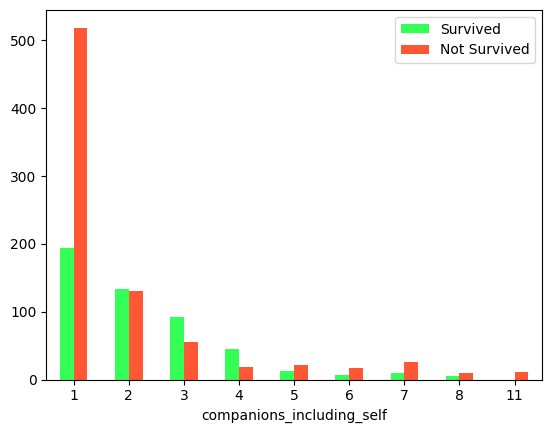

In [203]:
Survived_no_of_companions.plot(kind='bar',color=['#33FF57','#FF5733'])
plt.legend(['Survived','Not Survived'])
plt.xticks(rotation=0)

#### Observations:

The survival rate is worst when the passanger is alone.

But rises up with groups of 2,3 and 4.

Then drops down when the groups get bigger